In [1]:
from copy import deepcopy
from typing import Optional

from util.explain import preprocess, negation_atoms, _derivation_path, _dependency_assumption, explanation_graph, Literal
import networkx as nx

In [2]:
a, b, c, e, f, k = (Literal(x, preferred_negation_symbol='~') for x in ('a', 'b', 'c', 'e', 'f', 'k'))

example_program = {
    e: [dict()],
    b: [dict(positive=[], negative=[a])],
    k: [dict(positive=[e], negative=[b])],
    a: [dict(positive=[k], negative=[b])],
    c: [dict(positive=[a, b], negative=[]), dict(positive=[k], negative=[])],
    f: [dict(positive=[e], negative=[k, c])]
}

example_facts = {e}

example_answer_set = {b, f, e}

example_derivable_dict = {
    f: [{~k, ~c, e}],
    b: [{~a}],
    ~c: [{~k, ~a}],
    ~k: [{b}],
    ~a: [{~k}, {b}],
    e: [{"T"}]
}

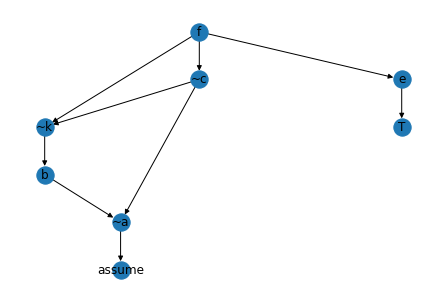

In [3]:
graph:Optional[nx.DiGraph] = explanation_graph(f, deepcopy(example_derivable_dict), {a}, deepcopy(example_answer_set))
assert graph is not None
pos = nx.nx_pydot.pydot_layout(graph, 'dot', f)
nx.draw(graph, pos=pos, with_labels=True)

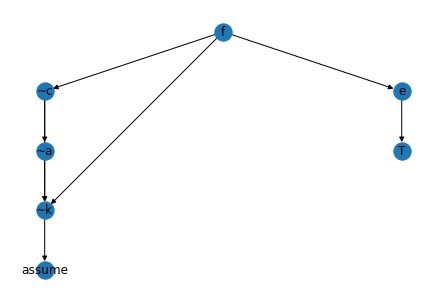

In [4]:
graph = explanation_graph(f, deepcopy(example_derivable_dict), {k}, deepcopy(example_answer_set))
assert graph is not None
pos = nx.nx_pydot.pydot_layout(graph, 'dot', f)
nx.draw(graph, pos=pos, with_labels=True)

In [9]:
t = Literal(name="t", sign=1)
t

t

In [10]:
str(-t)

'-t'

In [11]:
str(~t)

'~t'

In [12]:
str(t.lnot())

'¬t'